In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook 

Using Theano backend.


In [2]:
model = Sequential()
model.add(Dense(output_dim=64, input_dim=2))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer=Adam())

In [3]:
# generate data based on f
def gen_train_data(f, data_range):
    X, Y = numpy.meshgrid(numpy.arange(*data_range), numpy.arange(*data_range))
    Z = f((X, Y))
    return X, Y, Z

def plot_surf(X, Y, Z, ax):
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, cmap=cm.Reds_r, antialiased=False)

<IPython.core.display.Javascript object>


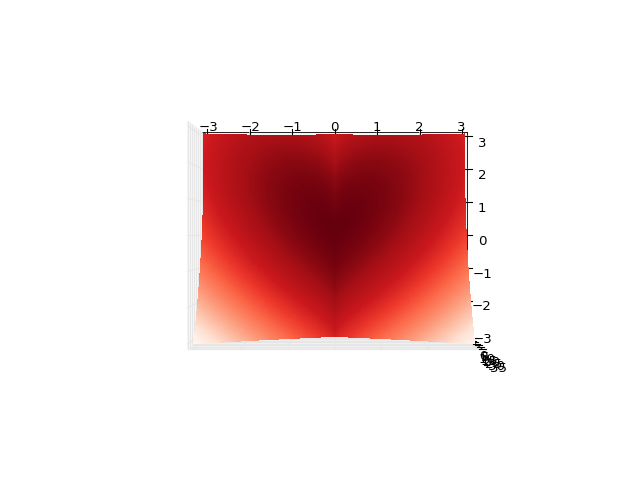

Epoch 1/200
90000/90000 [==============================] - 1s - loss: 31.4996     
Epoch 2/200
90000/90000 [==============================] - 1s - loss: 23.0188     
Epoch 3/200
90000/90000 [==============================] - 1s - loss: 19.9382     
Epoch 4/200
90000/90000 [==============================] - 1s - loss: 19.7047     
Epoch 5/200
90000/90000 [==============================] - 1s - loss: 17.1799     
Epoch 6/200
90000/90000 [==============================] - 1s - loss: 4.5474     
Epoch 7/200
90000/90000 [==============================] - 1s - loss: 2.1169     
Epoch 8/200
90000/90000 [==============================] - 1s - loss: 1.3929     
Epoch 9/200
90000/90000 [==============================] - 1s - loss: 1.0536     
Epoch 10/200
90000/90000 [==============================] - 1s - loss: 0.8533     
Epoch 11/200
90000/90000 [==============================] - 1s - loss: 0.7380     
Epoch 12/200
90000/90000 [==============================] - 1s - loss: 0.6601     
Epoch 13

In [4]:
# training
# simple function
# f = lambda x: 2 * x[0] ** 2 - 3 * x[1] ** 2 + 1
# love function
f = lambda x: x[0] ** 2 + (x[1] - (x[0] ** 2.0)**(1.0/3))**2

data_range = (-3, 3, 0.02)
X_train, Y_train, Z_train = gen_train_data(f, data_range)
XY_train = numpy.vstack((X_train.flatten(),Y_train.flatten())).T
fig = plt.figure()
ax = fig.gca(projection='3d')
plot_surf(X_train, Y_train, Z_train, ax)
ax.view_init(90, 270)
plt.show()

model.fit(XY_train, Z_train.flatten(), nb_epoch=200, batch_size=32)



<IPython.core.display.Javascript object>


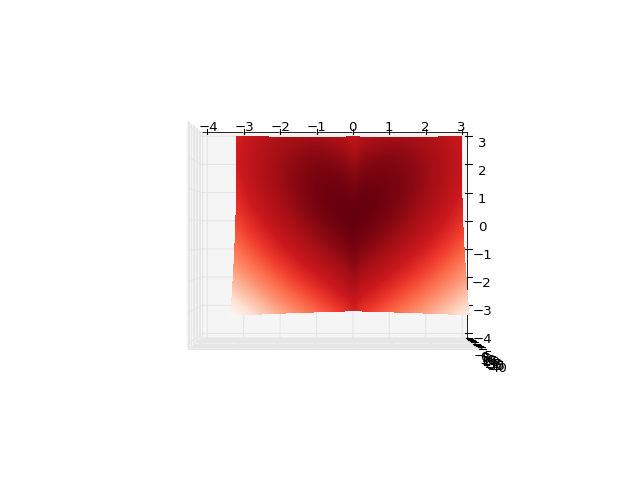

0.0513524832079


In [5]:
# test
data_range = (-3.1, 2.9, 0.02)
X_test, Y_test, Z_test = gen_train_data(f, data_range)
XY_test = numpy.vstack((X_test.flatten(),Y_test.flatten())).T
Z_predict = model.predict(XY_test, batch_size=32)

fig = plt.figure()
ax = fig.gca(projection='3d')
plot_surf(X_test, Y_test, Z_predict.reshape(Z_test.shape), ax)
ax.view_init(90, 270)
plt.show()
print(numpy.sqrt(numpy.mean((Z_test.flatten()-Z_predict.flatten())**2)))